<a href="https://colab.research.google.com/github/rohansejwal-netizen/Price-Prediction/blob/main/gurugram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GURUGRAM PROPERTY DATA


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [3]:
file_path='/content/gurgaon_10k.csv'
gurugram = pd.read_csv(file_path, engine='python', on_bad_lines='skip')


In [16]:
gurugram.columns


Index(['ID', 'PHOTO_URL', 'MEDIUM_PHOTO_URL', 'PREFERENCE', 'DESCRIPTION',
       'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'TRANSACT_TYPE', 'OWNTYPE',
       'BEDROOM_NUM', 'BATHROOM_NUM', 'BALCONY_NUM', 'PRICE_PER_UNIT_AREA',
       'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM', 'TOTAL_FLOOR', 'FEATURES',
       'REGISTER_DATE', 'PROP_NAME', 'MIN_PRICE', 'MAX_PRICE', 'PRICE_SQFT',
       'LISTING', 'BUILDING_ID', 'CARPET_SQFT', 'SUPERBUILTUP_SQFT',
       'BROKERAGE', 'MAP_DETAILS', 'FSL_Data', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'FORMATTED', 'AMENITIES', 'TOP_USPS', 'PD_URL',
       'EXPIRY_DATE', 'GROUP_NAME', 'AREA', 'PRICE', 'PROP_HEADING',
       'PROP_DETAILS_URL', 'CLASS_HEADING', 'CLASS_LABEL', 'SECONDARY_TAGS',
       'PROPERTY_IMAGES', 'THUMBNAIL_IMAGES', 'TOTAL_LANDMARK_COUNT',
       'FORMATTED_LANDMARK_DETAILS', 'CONTACT_NAME', 'CONTACT_COMPANY_NAME',
       'DEALER_PHOTO_URL', 'SOCIETY_NAME', 'BUILDING_NAME', 'CITY_ID',
       'LOCALITY_WO_CITY', 'profile', 'xid', 'metadata',

In [17]:
import pandas as pd

file_path='/content/gurgaon_10k.csv'
gurugram = pd.read_csv(file_path, engine='python', on_bad_lines='skip')

main_columns=[
    'PROP_ID',
    'PROPERTY_TYPE',
    'CITY',
    'LOCALITY',
    'BEDROOM_NUM',
    'BATHROOM_NUM',
    'BALCONY_NUM',
    'FURNISH',
    'FACING',
    'AGE',
    'FLOOR_NUM',
    'TOTAL_FLOOR',
    'PRICE_SQFT',
    'GROUP_NAME',
    'AREA',
    'PRICE',
    'SOCIETY_NAME',
    'CLASS_LABEL',
    'OWNTYPE',
    'LISTING',
    'CLASS_HEADING',
    'SECONDARY_TAGS',
    'TOTAL_LANDMARK_COUNT',
    'CONTACT_COMPANY_NAME',
    'LOCALITY_WO_CITY',
    'PRICE_PER_UNIT_AREA'

]
df_small = gurugram[main_columns].copy()
display(df_small.head())

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,SOCIETY_NAME,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA
0,O71585872,Residential Apartment,Gurgaon,Sector 84 Gurgaon,4.0,4,4.0,4,1,2,...,Alpha Corp GurgaonOne 84,Dealer,1,R,Dealer: propertyline,"['READY TO MOVE', 'RESALE']",10.0,propertyline,Sector 84,8766.0
1,T71585466,Residential Apartment,Gurgaon,Sector 81 Gurgaon,4.0,4,3.0,4,1,1,...,DLF The Ultima,Dealer,1,R,Dealer: MVD AND ASSOCIATES,"['READY TO MOVE', 'RESALE', 'RERA']",9.0,MVD AND ASSOCIATES,Sector 81,21176.0
2,D71549524,Residential Apartment,Gurgaon,Sector 66 Gurgaon,3.0,3,2.0,1,4,1,...,Emaar MGF The Palm Drive,Dealer,0,R,Dealer: 1st Nest Realtors,['FURNISHED'],14.0,1st Nest Realtors,Sector 66,43.0
3,I71493958,Residential Apartment,Gurgaon,Sector 112 Gurgaon,3.0,3,3.0,4,0,1,...,Experion Windchants,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE', 'RERA']",8.0,GROW MORE,Sector 112,13740.0
4,H71479412,Residential Apartment,Gurgaon,Sector 104 Gurgaon,3.0,4,4.0,4,6,1,...,ATS Triumph,Dealer,0,R,Dealer: GROW MORE,[],14.0,GROW MORE,Sector 104,17.0


In [18]:
gurugram=df_small

In [19]:
gurugram['LOCALITY_WO_CITY'].isna().sum()

np.int64(0)

#new changes

In [20]:
gurugram['CONTACT_COMPANY_NAME'].isna().sum()
gurugram.dropna(subset=['CONTACT_COMPANY_NAME'],inplace=True)

#new changes

In [21]:
gurugram['TOTAL_LANDMARK_COUNT'].isna().sum()
gurugram.dropna(subset=['TOTAL_LANDMARK_COUNT'],inplace=True)

#new changes

In [22]:
gurugram['SECONDARY_TAGS'].replace('[]',np.nan,inplace=True)

/tmp/ipython-input-3849607050.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gurugram['SECONDARY_TAGS'].replace('[]',np.nan,inplace=True)


#new changes

In [23]:
gurugram['SECONDARY_TAGS'].isna().sum()
gurugram.dropna(subset=['SECONDARY_TAGS'],inplace=True)

In [24]:
gurugram=df_small

In [25]:
gurugram

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,SOCIETY_NAME,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA
0,O71585872,Residential Apartment,Gurgaon,Sector 84 Gurgaon,4.0,4,4.0,4,1,2,...,Alpha Corp GurgaonOne 84,Dealer,1,R,Dealer: propertyline,"['READY TO MOVE', 'RESALE']",10.0,propertyline,Sector 84,8766.0
1,T71585466,Residential Apartment,Gurgaon,Sector 81 Gurgaon,4.0,4,3.0,4,1,1,...,DLF The Ultima,Dealer,1,R,Dealer: MVD AND ASSOCIATES,"['READY TO MOVE', 'RESALE', 'RERA']",9.0,MVD AND ASSOCIATES,Sector 81,21176.0
2,D71549524,Residential Apartment,Gurgaon,Sector 66 Gurgaon,3.0,3,2.0,1,4,1,...,Emaar MGF The Palm Drive,Dealer,0,R,Dealer: 1st Nest Realtors,['FURNISHED'],14.0,1st Nest Realtors,Sector 66,43.0
3,I71493958,Residential Apartment,Gurgaon,Sector 112 Gurgaon,3.0,3,3.0,4,0,1,...,Experion Windchants,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE', 'RERA']",8.0,GROW MORE,Sector 112,13740.0
5,X71361930,Residential Apartment,Gurgaon,Sector 104 Gurgaon,3.0,4,4.0,4,2,1,...,ATS Triumph,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE']",14.0,GROW MORE,Sector 104,8515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,D71780966,Residential Apartment,Gurgaon,Sector 81 Gurgaon,3.0,2,3.0,4,3,6,...,DLF The Ultima,Dealer,1,R,Dealer: BPM Realty,"['READY TO MOVE', 'RESALE', 'RERA']",9.0,BPM Realty,Sector 81,11887.0
10700,L71779362,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3.0,2,4.0,4,5,5,...,cendana,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.0,Avenue One,Sector 83,9100.0
10701,N71778916,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3.0,2,4.0,4,3,5,...,cendana,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.0,Avenue One,Sector 83,8896.0
10702,K71778134,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3.0,2,4.0,4,3,5,...,cendana Residences ss group,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.0,Avenue One,Sector 83,8965.0


In [26]:
gurugram.isna().sum()

,0
PROP_ID,0
PROPERTY_TYPE,0
CITY,0
LOCALITY,0
BEDROOM_NUM,192
BATHROOM_NUM,0
BALCONY_NUM,202
FURNISH,0
FACING,0
AGE,0


In [27]:
gurugram.dropna(subset=['BEDROOM_NUM'],inplace=True)
gurugram.dropna(subset=['BALCONY_NUM'],inplace=True)
gurugram.dropna(subset=['FLOOR_NUM'],inplace=True)
gurugram.dropna(subset=['TOTAL_FLOOR'],inplace=True)
gurugram.dropna(subset=['SOCIETY_NAME'],inplace=True)




In [28]:
gurugram.duplicated().sum()

np.int64(0)

In [29]:

gurugram['PROPERTY_TYPE'].unique()

array(['Residential Apartment', 'Independent/Builder Floor'], dtype=object)

In [30]:
gurugram['CITY'].unique()

array(['Gurgaon'], dtype=object)

In [31]:
gurugram['BEDROOM_NUM'].unique()

array([ 4.,  3.,  2.,  5.,  6.,  1., 10.,  7.,  8.])

In [32]:
gurugram['BATHROOM_NUM'].unique()

array([ 4,  3,  2,  5,  6,  7,  1, 11,  8])

In [33]:
gurugram['BALCONY_NUM'].unique()

array([4., 3., 2., 0., 1.])

In [34]:
gurugram['BEDROOM_NUM']=gurugram['BEDROOM_NUM'].astype(int)

In [35]:
gurugram['BALCONY_NUM']=gurugram['BALCONY_NUM'].astype(int)


In [36]:
gurugram['TOTAL_FLOOR']=gurugram['TOTAL_FLOOR'].astype(int)


In [37]:
gurugram['PRICE_SQFT']=gurugram['PRICE_SQFT'].astype(int)

In [38]:
gurugram[gurugram['TOTAL_FLOOR'] < 10]

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,SOCIETY_NAME,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA
9,S69432236,Independent/Builder Floor,Gurgaon,Sector 102 Gurgaon,3,3,3,4,6,1,...,BPTP Amstoria,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE']",11.0,GROW MORE,Sector 102,72607.0
22,B71337288,Independent/Builder Floor,Gurgaon,Sector 37D Gurgaon,3,3,2,4,4,5,...,Signature Global City,Dealer,1,R,Dealer: 1st Nest Realtors,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",10.0,1st Nest Realtors,Sector 37D,12105.0
43,G71144798,Independent/Builder Floor,Gurgaon,Sector 57 Gurgaon,4,4,2,4,5,6,...,Sector 57,Dealer,1,R,Dealer: OPTUS HOUSING,"['READY TO MOVE', 'RESALE']",45.0,OPTUS HOUSING,Sector 57,96491.0
81,B70932064,Independent/Builder Floor,Gurgaon,Sector 82 Gurgaon,2,2,2,4,3,1,...,Vatika Independent Floors,Dealer,1,R,Dealer: Bliss Consultants,"['READY TO MOVE', 'RESALE']",8.0,Bliss Consultants,Sector 82,44305.0
87,Z70797022,Independent/Builder Floor,Gurgaon,Sector 82 Gurgaon,2,2,2,4,1,1,...,Vatika Independent Floors,Dealer,1,R,Dealer: Bliss Consultants,"['READY TO MOVE', 'RESALE']",8.0,Bliss Consultants,Sector 82,44444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,N71791096,Residential Apartment,Gurgaon,Sector 82 Gurgaon,4,4,4,1,5,6,...,Vatika Independent Floors,Dealer,1,R,Dealer: Avenue One,"['READY TO MOVE', 'RESALE']",8.0,Avenue One,Sector 82,65155.0
10686,S71785494,Residential Apartment,Gurgaon,Sector 95 Gurgaon,3,3,3,4,5,5,...,Landmark Avana,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",11.0,Avenue One,Sector 95,6907.0
10688,Z71785246,Residential Apartment,Gurgaon,Sector 89 Gurgaon,3,3,4,4,5,5,...,Smart World Gems,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",14.0,Avenue One,Sector 89,8924.0
10689,S71785050,Residential Apartment,Gurgaon,Sector 89 Gurgaon,3,3,4,4,5,5,...,M3M Soulitude,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",9.0,Avenue One,Sector 89,9135.0


In [39]:
gurugram['AREA'] = gurugram['AREA'].astype(str).str.extract(r'(\d+)')
gurugram['AREA'] = gurugram['AREA'].astype(float)

In [40]:
gurugram['AREA']=gurugram['AREA'].astype(int)

In [41]:
gurugram

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,SOCIETY_NAME,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA
0,O71585872,Residential Apartment,Gurgaon,Sector 84 Gurgaon,4,4,4,4,1,2,...,Alpha Corp GurgaonOne 84,Dealer,1,R,Dealer: propertyline,"['READY TO MOVE', 'RESALE']",10.0,propertyline,Sector 84,8766.0
1,T71585466,Residential Apartment,Gurgaon,Sector 81 Gurgaon,4,4,3,4,1,1,...,DLF The Ultima,Dealer,1,R,Dealer: MVD AND ASSOCIATES,"['READY TO MOVE', 'RESALE', 'RERA']",9.0,MVD AND ASSOCIATES,Sector 81,21176.0
2,D71549524,Residential Apartment,Gurgaon,Sector 66 Gurgaon,3,3,2,1,4,1,...,Emaar MGF The Palm Drive,Dealer,0,R,Dealer: 1st Nest Realtors,['FURNISHED'],14.0,1st Nest Realtors,Sector 66,43.0
3,I71493958,Residential Apartment,Gurgaon,Sector 112 Gurgaon,3,3,3,4,0,1,...,Experion Windchants,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE', 'RERA']",8.0,GROW MORE,Sector 112,13740.0
5,X71361930,Residential Apartment,Gurgaon,Sector 104 Gurgaon,3,4,4,4,2,1,...,ATS Triumph,Dealer,1,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE']",14.0,GROW MORE,Sector 104,8515.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10699,D71780966,Residential Apartment,Gurgaon,Sector 81 Gurgaon,3,2,3,4,3,6,...,DLF The Ultima,Dealer,1,R,Dealer: BPM Realty,"['READY TO MOVE', 'RESALE', 'RERA']",9.0,BPM Realty,Sector 81,11887.0
10700,L71779362,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3,2,4,4,5,5,...,cendana,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.0,Avenue One,Sector 83,9100.0
10701,N71778916,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3,2,4,4,3,5,...,cendana,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.0,Avenue One,Sector 83,8896.0
10702,K71778134,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3,2,4,4,3,5,...,cendana Residences ss group,Dealer,1,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.0,Avenue One,Sector 83,8965.0


In [42]:

import re

def convert_price(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()  # remove commas

        # ----- Crores -----
        if 'Cr' in x:
            num = float(re.findall(r'\d+\.?\d*', x)[0])
            return num * 10000000   # 1 Cr = 10,000,000

        # ----- Lakhs -----
        if 'L' in x or 'Lac' in x or 'Lakh' in x:
            num = float(re.findall(r'\d+\.?\d*', x)[0])
            return num * 100000     # 1 Lakh = 100,000

        # ----- Normal Numbers -----
        if x.isnumeric():
            return float(x)

    return None

gurugram['PRICE_NUM'] = gurugram['PRICE'].apply(convert_price)



In [43]:
gurugram.rename(columns={'PRICE_NUM': 'PRICEE'},inplace=True)

In [44]:
gurugram['OWNTYPE'].unique()

array([1, 0, 3, 4, 2])

In [45]:
gurugram.drop('PRICE',axis=1,inplace=True)

In [46]:
gurugram.isna().sum()

,0
PROP_ID,0
PROPERTY_TYPE,0
CITY,0
LOCALITY,0
BEDROOM_NUM,0
BATHROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [47]:
gurugram.dropna(subset=['PRICEE'],inplace=True)

In [48]:
gurugram[gurugram['PRICE_SQFT']<3000]

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA,PRICEE
2,D71549524,Residential Apartment,Gurgaon,Sector 66 Gurgaon,3,3,2,1,4,1,...,Dealer,0,R,Dealer: 1st Nest Realtors,['FURNISHED'],14.0,1st Nest Realtors,Sector 66,43.0,85000.0
36,Y71171970,Residential Apartment,Gurgaon,Sector 113 Gurgaon,2,2,3,1,5,6,...,Dealer,0,R,Dealer: Four corners,"['FURNISHED', 'FOR SINGLE MEN', 'FOR SINGLE WO...",9.0,Four corners,Sector 113 Gurgaon,33.0,43500.0
70,E70996706,Residential Apartment,Gurgaon,Sector 62 Gurgaon,4,5,4,4,1,1,...,Dealer,0,R,Dealer: OPTUS HOUSING,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",12.0,OPTUS HOUSING,Sector 62,48.0,150000.0
71,R70996352,Residential Apartment,Gurgaon,Sector 62 Gurgaon,4,6,4,4,1,1,...,Dealer,0,R,Dealer: OPTUS HOUSING,"['FOR SINGLE MEN', 'FOR SINGLE WOMEN']",11.0,OPTUS HOUSING,Sector 62,32.0,250000.0
72,I70970198,Residential Apartment,Gurgaon,Sector 54 Gurgaon,3,5,3,1,1,3,...,Dealer,0,R,Dealer: OPTUS HOUSING,['FURNISHED'],9.0,OPTUS HOUSING,Sector 54,82.0,238000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,V69976088,Residential Apartment,Gurgaon,Sector 81 Gurgaon,3,2,2,2,3,5,...,Dealer,1,R,Dealer: GLS Consultants,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",8.0,GLS Consultants,Sector 81,2897.0,2289000.0
8661,E71338254,Residential Apartment,Gurgaon,Sector 95 Gurgaon,2,2,1,4,3,1,...,Dealer,1,P,Dealer: Vicky,"['READY TO MOVE', 'RESALE', 'RERA']",3.0,Vicky,Sector 95,2426.0,2378000.0
9827,Q71590308,Residential Apartment,Gurgaon,Sector 107 Gurgaon,2,2,2,4,7,1,...,Dealer,1,R,Dealer: Gupta Property,"['READY TO MOVE', 'RESALE', 'RERA']",3.0,Gupta Property,Sector 107,7.0,4130000.0
9832,A71163604,Residential Apartment,Gurgaon,Sector 107 Gurgaon,2,2,2,2,5,6,...,Dealer,1,R,Dealer: Gupta Property,"['READY TO MOVE', 'RESALE', 'RERA']",3.0,Gupta Property,Sector 107,7.0,4100000.0


In [49]:
gurugram.drop(gurugram[gurugram["PRICEE"]<3000].index,inplace=True)

In [50]:
gurugram.drop(gurugram[gurugram['PRICEE']<7000000].index,inplace=True)

In [51]:
gurugram.drop(gurugram[gurugram["AREA"]>10000].index,inplace=True)

In [52]:
gurugram.drop(gurugram[gurugram['PRICE_SQFT']<3000].index,inplace=True)

In [53]:
gurugram['GROUP_NAME'].unique()

array(['SPID_GROUP_SEARCH_NORMAL', 'SPID_CONF_GROUPING'], dtype=object)

In [54]:
gurugram.drop('GROUP_NAME',axis=1,inplace=True)

In [55]:
gurugram['CLASS_LABEL'].unique()

array(['Dealer'], dtype=object)

In [56]:
gurugram['OWNTYPE'].unique()

array([1, 3, 4, 2])

In [57]:
gurugram['PRICEE'].max()

2900000000.0

In [58]:
gurugram[gurugram['PRICEE']>250000000]

,PROP_ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,CLASS_LABEL,OWNTYPE,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICE_PER_UNIT_AREA,PRICEE
1183,M71352450,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,3,4,5,6,...,Dealer,1,R,Dealer: Heartland Realty\t,"['READY TO MOVE', 'RESALE']",15.0,Heartland Realty\t,Sector 42,66891.0,4.950000e+08
1184,Y71351884,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,3,4,1,6,...,Dealer,1,R,Dealer: Heartland Realty\t,"['READY TO MOVE', 'RESALE']",15.0,Heartland Realty\t,Sector 42,64864.0,4.800000e+08
1219,J69622520,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,3,2,1,1,...,Dealer,1,R,Dealer: Heartland Realty\t,"['READY TO MOVE', 'RESALE']",15.0,Heartland Realty\t,Sector 42,45312.0,2.850000e+08
1242,I71286460,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,4,4,5,1,...,Dealer,1,R,Dealer: Golden Key,"['READY TO MOVE', 'RESALE']",15.0,Golden Key,Sector 42,53125.0,3.400000e+08
2029,Q68306438,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,2,4,0,2,...,Dealer,1,R,Dealer: Temple Homes Pvt. Ltd.,"['READY TO MOVE', 'RESALE']",15.0,Temple Homes Pvt. Ltd.,Sector 42,53108.0,3.400000e+08
2158,Y70939310,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,4,4,3,2,...,Dealer,1,R,Dealer: SkyTree RealTech,"['READY TO MOVE', 'RESALE']",15.0,SkyTree RealTech,Sector 42,50000.0,3.200000e+08
2193,S69993002,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,4,2,5,2,...,Dealer,1,R,Dealer: HOME LAND TRADE,"['READY TO MOVE', 'RESALE']",15.0,HOME LAND TRADE,Sector 42,45312.0,2.900000e+08
2205,X71427746,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,4,1,2,2,...,Dealer,1,R,Dealer: HMP REALTORS & DEVELOPERS,"['READY TO MOVE', 'RESALE']",15.0,HMP REALTORS & DEVELOPERS,Sector 42,50000.0,3.200000e+08
2344,T69993062,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,4,2,5,2,...,Dealer,1,R,Dealer: HOME LAND TRADE,"['READY TO MOVE', 'RESALE']",15.0,HOME LAND TRADE,Sector 42,46875.0,3.000000e+08
2345,K69993126,Residential Apartment,Gurgaon,Sector 42 Gurgaon,4,4,4,4,5,2,...,Dealer,1,R,Dealer: HOME LAND TRADE,"['READY TO MOVE', 'RESALE']",15.0,HOME LAND TRADE,Sector 42,50000.0,3.200000e+08


In [125]:
# Function to calculate outliers using IQR
def count_outliers_iqr(gurugram, column):
    Q1 = gurugram[column].quantile(0.25)
    Q3 = gurugram[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = gurugram[(gurugram[column] < lower_bound) | (gurugram[column] > upper_bound)]
    return len(outliers)

# Count outliers for 'REG_FEE' and 'SALES_PRICE'
outliers_PRICEE = count_outliers_iqr(gurugram, 'PRICEE')
outliers_PRICE_SQFT = count_outliers_iqr(gurugram, 'PRICE_SQFT')
outliers_AREA = count_outliers_iqr(gurugram,'AREA')
outliers_BEDROOM_NUM = count_outliers_iqr(gurugram,'BEDROOM_NUM')
outliers_BATHROOM_NUM = count_outliers_iqr(gurugram,'BATHROOM_NUM')
outliers_BALCONY_NUM = count_outliers_iqr(gurugram,'BALCONY_NUM')
outliers_FURNISH = count_outliers_iqr(gurugram,'FURNISH')
outliers_AGE = count_outliers_iqr(gurugram,'AGE')
outliers_TOTAL_FLOOR = count_outliers_iqr(gurugram,'TOTAL_FLOOR')
# outliers_OWNTYPE = count_outliers_iqr(gurugram,'OWNTYPE')
outliers_TOTAL_LANDMARK_COUNT = count_outliers_iqr(gurugram,'TOTAL_LANDMARK_COUNT')
outliers_PRICE_PER_UNIT_AREA = count_outliers_iqr(gurugram,'PRICE_PER_UNIT_AREA')


print(f"Number of outliers in 'PRICEE': {outliers_PRICEE}")
print(f"Number of outliers in 'PRICE_SQFT': {outliers_PRICE_SQFT}")
print(f"Number of outliers in 'AREA': {outliers_AREA}")
print(f"Number of outliers in 'BEDROOM_NUM': {outliers_BEDROOM_NUM}")
print(f"Number of outliers in 'BATHROOM_NUM': {outliers_BATHROOM_NUM}")
print(f"Number of outliers in 'BALCONY_NUM': {outliers_BALCONY_NUM}")
print(f"Number of outliers in 'FURNISH': {outliers_FURNISH}")
print(f"Number of outliers in 'AGE': {outliers_AGE}")
print(f"Number of outliers in 'TOTAL_FLOOR': {outliers_TOTAL_FLOOR}")
# print(f"Number of outliers in 'OWNTYPE': {outliers_OWNTYPE}")
print(f"Number of outliers in 'TOTAL_LANDMARK_COUNT': {outliers_TOTAL_LANDMARK_COUNT}")
print(f"Number of outliers in 'PRICE_PER_UNIT_AREA': {outliers_PRICE_PER_UNIT_AREA}")











Number of outliers in 'PRICEE': 0
Number of outliers in 'PRICE_SQFT': 0
Number of outliers in 'AREA': 0
Number of outliers in 'BEDROOM_NUM': 0
Number of outliers in 'BATHROOM_NUM': 0
Number of outliers in 'BALCONY_NUM': 0
Number of outliers in 'FURNISH': 0
Number of outliers in 'AGE': 0
Number of outliers in 'TOTAL_FLOOR': 0
Number of outliers in 'TOTAL_LANDMARK_COUNT': 0
Number of outliers in 'PRICE_PER_UNIT_AREA': 0


In [126]:
#Remove outliers for 'FACING' using IQR
Q1_FACING = gurugram['FACING'].quantile(0.25)
Q3_FACING = gurugram['FACING'].quantile(0.75)
IQR_FACING = Q3_FACING - Q1_FACING
lower_bound_FACING = Q1_FACING - 1.5 * IQR_FACING
upper_bound_FACING = Q3_FACING + 1.5 * IQR_FACING

gurugram = gurugram [(gurugram['FACING'] >= lower_bound_FACING) & (gurugram['FACING'] <= upper_bound_FACING)]

# Verify the number of outliers in 'FACING' after removal

outliers_FACING_cleaned = count_outliers_iqr(gurugram,'FACING')

print(f"Number of outliers in 'FACING' after removal: {outliers_FACING_cleaned}")

Number of outliers in 'FACING' after removal: 0


In [127]:
# # Remove outlier for 'PRICE_PER_UNIT_AREA' using IQR
# Q1_PRICE_PER_UNIT_AREA = gurugram['PRICE_PER_UNIT_AREA'].quantile(0.25)
# Q3_PRICE_PER_UNIT_AREA = gurugram['PRICE_PER_UNIT_AREA'].quantile(0.75)
# IQR_PRICE_PER_UNIT_AREA = Q3_PRICE_PER_UNIT_AREA - Q1_PRICE_PER_UNIT_AREA
# lower_bound_PRICE_PER_UNIT_AREA = Q1_PRICE_PER_UNIT_AREA - 1.5 * IQR_PRICE_PER_UNIT_AREA
# upper_bound_PRICE_PER_UNIT_AREA = Q3_PRICE_PER_UNIT_AREA + 1.5 * IQR_PRICE_PER_UNIT_AREA

# gurugram = gurugram[(gurugram['PRICE_PER_UNIT_AREA'] >= lower_bound_PRICE_PER_UNIT_AREA) & (gurugram['PRICE_PER_UNIT_AREA'] <= upper_bound_PRICE_PER_UNIT_AREA)]

# # Verify the number of outlier in 'PRICE_PER_UNIT_AREA' after removal

# OUTLIERS_PRICE_PER_UNIT_AREA_CLEANED = count_outliers_iqr(gurugram,"PRICE_PER_UNIT_AREA")

# print(f"Number of outliers in 'PRICE_PER_UNIT_AREA' after removal: {OUTLIERS_PRICE_PER_UNIT_AREA_CLEANED}")

In [128]:
#Remove outliers for "BALCONY_NUM" using IQR
Q1_BALCONY_NUM = gurugram['BALCONY_NUM'].quantile(0.25)
Q3_BALCONY_NUM = gurugram['BALCONY_NUM'].quantile(0.75)
IQR_BALCONY_NUM = Q3_BALCONY_NUM - Q1_BALCONY_NUM
lower_bound_BALCONY_NUM = Q1_BALCONY_NUM - 1.5 * IQR_BALCONY_NUM
upper_bound_BALCONY_NUM = Q3_BALCONY_NUM + 1.5 * IQR_BALCONY_NUM

gurugram = gurugram[(gurugram['BALCONY_NUM'] >= lower_bound_BALCONY_NUM) & (gurugram['BALCONY_NUM'] <= upper_bound_BALCONY_NUM)]

# Verify the number of outliers in 'BALCONY_NUM' after removal

OUTLIERS_BALCONY_NUM_CLEANED = count_outliers_iqr(gurugram,'BALCONY_NUM')

print(f"Number of outliers in 'BALCONY_NUM' after removal : {OUTLIERS_BALCONY_NUM_CLEANED}")

Number of outliers in 'BALCONY_NUM' after removal : 0


In [129]:
#Remove outliers for 'TOTAL_LANDMARK_COUNT' using IQR

Q1_TOTAL_LANDMARK_COUNT = gurugram['TOTAL_LANDMARK_COUNT'].quantile(0.25)
Q3_TOTAL_LANDMARK_COUNT = gurugram['TOTAL_LANDMARK_COUNT'].quantile(0.75)
IQR_TOTAL_LANDMARK_COUNT = Q3_TOTAL_LANDMARK_COUNT - Q1_TOTAL_LANDMARK_COUNT
lower_bound_TOTAL_LANDMARK_COUNT = Q1_TOTAL_LANDMARK_COUNT - 1.5 * IQR_TOTAL_LANDMARK_COUNT
upper_bound_TOTAL_LANDMARK_COUNT = Q3_TOTAL_LANDMARK_COUNT + 1.5 * IQR_TOTAL_LANDMARK_COUNT

gurugram = gurugram[(gurugram['TOTAL_LANDMARK_COUNT'] >= lower_bound_TOTAL_LANDMARK_COUNT) & (gurugram['TOTAL_LANDMARK_COUNT'] <= upper_bound_TOTAL_LANDMARK_COUNT)]

# Verify the number of outliers in 'TOTAL_LANDMARK_COUNT'after removal

outliers_TOTAL_LANDMARK_COUNT_removed = count_outliers_iqr(gurugram,'TOTAL_LANDMARK_COUNT')

print(f"Number of outliers in 'TOTAL_LANDMARK_COUNT' after removal: {outliers_TOTAL_LANDMARK_COUNT}")


Number of outliers in 'TOTAL_LANDMARK_COUNT' after removal: 0


In [130]:
#Remove outliers for 'BEDROOM_NUM' using IQR
Q1_BEDROOM_NUM = gurugram['BEDROOM_NUM'].quantile(0.25)
Q3_BEDROOM_NUM = gurugram['BEDROOM_NUM'].quantile(0.75)
IQR_BEDROOM_NUM = Q3_BEDROOM_NUM - Q1_BEDROOM_NUM
lower_bound_BEDROOM_NUM = Q1_BEDROOM_NUM - 1.5 * IQR_BEDROOM_NUM
upper_bound_BEDROOM_NUM = Q3_BEDROOM_NUM + 1.5 * IQR_BEDROOM_NUM

gurugram = gurugram[(gurugram['BEDROOM_NUM'] >= lower_bound_BEDROOM_NUM) & (gurugram['BEDROOM_NUM'] <= upper_bound_BEDROOM_NUM)]

# Verify the number of outliers in 'BEDROOM_NUM' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram, 'BEDROOM_NUM')

print(f"Number of outrliers in 'BEDROOM_NUM' after removal: {outliers_gurugram_cleaned}")

Number of outrliers in 'BEDROOM_NUM' after removal: 0


In [131]:
#Remove outlier for "TOTAL_FLOOR" using IQR

Q1_TOTAL_FLOOR = gurugram['TOTAL_FLOOR'].quantile(0.25)
Q3_TOTAL_FLOOR = gurugram['TOTAL_FLOOR'].quantile(0.75)
IQR_TOTAL_FLOOR = Q3_TOTAL_FLOOR - Q1_TOTAL_FLOOR
lower_bound_TOTAL_FLOOR = Q1_TOTAL_FLOOR - 1.5 * IQR_TOTAL_FLOOR
upper_bound_TOTAL_FLOOR = Q3_TOTAL_FLOOR + 1.5 * IQR_TOTAL_FLOOR

gurugram = gurugram[(gurugram["TOTAL_FLOOR"] >= lower_bound_TOTAL_FLOOR) & (gurugram["TOTAL_FLOOR"] <= upper_bound_TOTAL_FLOOR)]


# Verify the number of outliers in 'TOTAL_FLOOR' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram,'TOTAL_FLOOR')

print(f"Number of outliers in 'TOTAL_FLOOR' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'TOTAL_FLOOR' after removal: 0


In [132]:
# Remove outliers for 'OWNTYPE' suing IQR

Q1_OWNTYPE = gurugram['OWNTYPE'].quantile(0.25)
Q3_OWNTYPE = gurugram['OWNTYPE'].quantile(0.75)
IQR_OWNTYPE = Q3_OWNTYPE - Q1_OWNTYPE
lower_bound_OWNTYPE = Q1_OWNTYPE - 1.5 * IQR_OWNTYPE
upper_bound_OWNTYPE = Q3_OWNTYPE + 1.5 * IQR_OWNTYPE

gurugram = gurugram[(gurugram['OWNTYPE'] >= lower_bound_OWNTYPE) & (gurugram["OWNTYPE"] <= upper_bound_OWNTYPE)]

#Verify the number of outliers in 'OWNTYPE' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram,'OWNTYPE')

print(f"Number of outliers in 'OWNTYPE' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'OWNTYPE' after removal: 0


In [133]:
#Remove outliers for 'BATHROOM_NUM' using IQR

Q1_BATHROOM_NUM = gurugram['BATHROOM_NUM'].quantile(0.25)
Q3_BATHROOM_NUM = gurugram["BATHROOM_NUM"].quantile(0.75)
IQR_BATHROOM_NUM = Q3_BATHROOM_NUM - Q1_BATHROOM_NUM
lower_bound_BATHROOM_NUM = Q1_BATHROOM_NUM - 1.5 * IQR_BATHROOM_NUM
upper_bound_BATHROOM_NUM = Q3_BATHROOM_NUM + 1.5 * IQR_BATHROOM_NUM

gurugram = gurugram[(gurugram['BATHROOM_NUM'] >= lower_bound_BATHROOM_NUM) & (gurugram['BATHROOM_NUM'] <= upper_bound_BATHROOM_NUM)]

# Verfiy the number of outliers in 'BATHROOM_NUM' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram,'BATHROOM_NUM')

print(f"Number of outliers in 'BATHROOM_NUM' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'BATHROOM_NUM' after removal: 0


In [134]:
# Remove outliers for 'Price' using IQR
Q1_PRICEE = gurugram['PRICE_SQFT'].quantile(0.25)
Q3_PRICEE= gurugram['PRICE_SQFT'].quantile(0.75)
IQR_PRICEE = Q3_PRICEE - Q1_PRICEE
lower_bound_PRICEE = Q1_PRICEE - 1.5 * IQR_PRICEE
upper_bound_PRICEE = Q3_PRICEE + 1.5 * IQR_PRICEE


gurugram = gurugram[(gurugram['PRICE_SQFT'] >= lower_bound_PRICEE) & (gurugram['PRICE_SQFT'] <= upper_bound_PRICEE)]

# Verify the number of outliers in 'Price' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram, 'PRICE_SQFT')


print(f"Number of outliers in 'PRICE_SQFT' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'PRICE_SQFT' after removal: 0


In [135]:
# Remove outliers for 'Price' using IQR
Q1_PRICEE = gurugram['PRICEE'].quantile(0.25)
Q3_PRICEE= gurugram['PRICEE'].quantile(0.75)
IQR_PRICEE = Q3_PRICEE - Q1_PRICEE
lower_bound_PRICEE = Q1_PRICEE - 1.5 * IQR_PRICEE
upper_bound_PRICEE = Q3_PRICEE + 1.5 * IQR_PRICEE

gurugram = gurugram[(gurugram['PRICEE'] >= lower_bound_PRICEE) & (gurugram['PRICEE'] <= upper_bound_PRICEE)]

# Verify the number of outliers in 'Price' after removal
outliers_gurugram_cleaned = count_outliers_iqr(gurugram, 'PRICEE')

print(f"Number of outliers in 'PRICEE' after removal: {outliers_gurugram_cleaned}")

Number of outliers in 'PRICEE' after removal: 0


In [136]:
#Remove outliers in 'AREA' using IQR
Q1_AREA = gurugram['AREA'].quantile(0.25)
Q3_AREA = gurugram['AREA'].quantile(0.75)
IQR_AREA = Q3_AREA - Q1_AREA
lower_bound_AREA = Q1_AREA - 1.5 * IQR_AREA
upper_bound_AREA = Q3_AREA + 1.5 * IQR_AREA

gurugram = gurugram[(gurugram['AREA'] >= lower_bound_AREA) & (gurugram['AREA'] <= upper_bound_AREA)]

#verify the number of outliers in 'AREA' after removal
outliers_AREA_cleaned = count_outliers_iqr(gurugram,'AREA')

print(f"number of outliers in 'AREA' after removal: {outliers_AREA_cleaned}")

number of outliers in 'AREA' after removal: 0


In [137]:
gurugram['PRICEE'].max()

35100000.0

In [139]:
gurugram['FLOOR_NUM'].replace('G',0,inplace=True)
gurugram['FLOOR_NUM'].replace('L',-1,inplace=True)

/tmp/ipython-input-3408776166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gurugram['FLOOR_NUM'].replace('G',0,inplace=True)
/tmp/ipython-input-3408776166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [140]:
gurugram['FLOOR_NUM'] = gurugram['FLOOR_NUM'].astype(int)

In [141]:
gurugram.dtypes

,0
PROP_ID,object
PROPERTY_TYPE,object
CITY,object
LOCALITY,object
BEDROOM_NUM,int64
BATHROOM_NUM,int64
BALCONY_NUM,int64
FURNISH,int64
FACING,int64
AGE,int64


In [142]:
import pandas as pd
import numpy as np

# Select only numerical columns for correlation matrix
numerical_cols = gurugram.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = gurugram[numerical_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

                      BEDROOM_NUM  BATHROOM_NUM  BALCONY_NUM   FURNISH  \
BEDROOM_NUM                   NaN           NaN          NaN       NaN   
BATHROOM_NUM                  NaN      1.000000     0.168420  0.015792   
BALCONY_NUM                   NaN      0.168420     1.000000 -0.017219   
FURNISH                       NaN      0.015792    -0.017219  1.000000   
FACING                        NaN      0.016118     0.066940  0.097000   
AGE                           NaN     -0.166020    -0.091401 -0.050865   
FLOOR_NUM                     NaN      0.133101     0.139139 -0.052075   
TOTAL_FLOOR                   NaN      0.123720     0.182708 -0.040294   
PRICE_SQFT                    NaN      0.028107    -0.050532  0.099236   
AREA                          NaN      0.493093     0.209451  0.023185   
OWNTYPE                       NaN           NaN          NaN       NaN   
TOTAL_LANDMARK_COUNT          NaN      0.114815    -0.016688  0.009302   
PRICE_PER_UNIT_AREA           NaN     

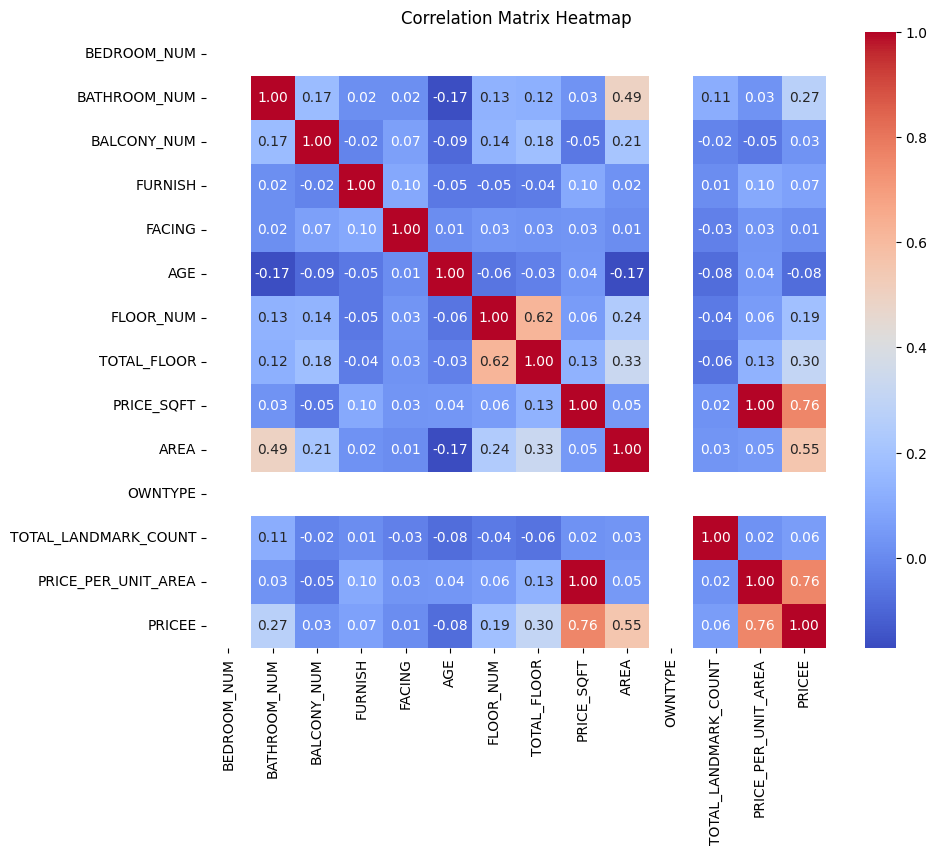

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [144]:
gurugram.rename(columns={'PROP_ID':'ID'},inplace=True)

In [145]:
le = LabelEncoder()
gurugram['ID'] = le.fit_transform(gurugram['ID'])

In [146]:
gurugram.drop('OWNTYPE',axis=1,inplace=True)

In [147]:
gurugram_80, gurugram_20=train_test_split(gurugram,test_size=0.2,random_state=42)
gurugram_20.to_csv('gurugram_price',index=False)

In [148]:
gurugram_80.drop('PRICE_SQFT',axis=1,inplace=True)

In [149]:
gurugram_80.to_csv('gurugram_80',index=False)

In [150]:
gurugram_20.drop(['PRICE_SQFT','PRICEE'],axis=1,inplace=True)

In [151]:
gurugram_20.to_csv('gurugram_20',index=False)

In [152]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [373]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('/content/gurugram_80')

# # ✅ Remove unnecessary index column if present
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Separate features and target
X = df.drop(['PRICEE','PRICE_PER_UNIT_AREA','ID','CITY','FLOOR_NUM','CLASS_LABEL'], axis=1)
y = df['PRICEE']

# Identify categorical columns (non-numeric)
cat_features = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Fill NaN values in categorical columns with a placeholder
for col in cat_features:
    X[col] = X[col].fillna('Unknown')


# Create CatBoost Pool (handles categorical columns automatically)
train_pool = Pool(data=X, label=y, cat_features=cat_features)

# Initialize and train CatBoost model

model = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.05,
    depth=7,
    loss_function='RMSE', # RMSE is suitable for log-transformed target
    random_seed=42,
    verbose=200
)

model.fit(train_pool)

# Save model
model.save_model('catboost_main_model.cbm')
print("✅ Model trained successfully and saved!")

print("Numeric features used:", X.select_dtypes(include=[np.number]).columns.tolist())

Categorical features: ['PROPERTY_TYPE', 'LOCALITY', 'SOCIETY_NAME', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY']
0:	learn: 5993606.7903855	total: 13ms	remaining: 1m 5s
200:	learn: 2109350.1899487	total: 2.92s	remaining: 1m 9s
400:	learn: 1646303.8035268	total: 4.67s	remaining: 53.5s
600:	learn: 1381817.5297357	total: 6.39s	remaining: 46.8s
800:	learn: 1184488.2188090	total: 8.11s	remaining: 42.5s
1000:	learn: 1033038.6327274	total: 11.4s	remaining: 45.7s
1200:	learn: 920311.8508831	total: 13.2s	remaining: 41.6s
1400:	learn: 825334.5864894	total: 14.9s	remaining: 38.2s
1600:	learn: 749140.4401837	total: 16.6s	remaining: 35.2s
1800:	learn: 675387.5235609	total: 18.3s	remaining: 32.5s
2000:	learn: 610984.9438407	total: 20.1s	remaining: 30.1s
2200:	learn: 551642.8373012	total: 22.7s	remaining: 28.9s
2400:	learn: 503353.4877368	total: 25.2s	remaining: 27.3s
2600:	learn: 460183.4299856	total: 27s	remaining: 24.9s
2800:	learn: 420481.1851039	total:

In [374]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

# Paths (adjust if your filenames differ)
train_path = '/content/gurugram_80'
test_path = '/content/gurugram_20'
model_path = '/content/catboost_main_model.cbm'

# Load training data to get schema
train_df = pd.read_csv(train_path)
expected_features = [c for c in train_df.columns if c != 'PRICEE']

# Detect categorical columns from training data
cat_features = train_df[expected_features].select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", cat_features)

# Load trained CatBoost model
model = CatBoostRegressor()
model.load_model(model_path)

# Load test data (without price)
test_df = pd.read_csv(test_path).copy()

# Make sure the test data has same columns as training data
for col in expected_features:
    if col not in test_df.columns:
        test_df[col] = np.nan

# Reorder columns to match training
X_test = test_df[expected_features]

# Convert categorical features to string type
for c in cat_features:
    X_test[c] = X_test[c].astype(str)

# Create Pool for CatBoost
test_pool = Pool(data=X_test, cat_features=cat_features)

# Predict prices
predictions = model.predict(test_pool)

# Add predictions to your test dataframe
test_df['PREDICTED_Price'] = predictions

# Save new CSV with predictions
output_path = '/content/gurugram_20_with_predicted_price.csv'
test_df.to_csv(output_path, index=False)

print("✅ Prediction complete! File saved as:", output_path)

# Display predictions in full number format
pd.options.display.float_format = '{:.2f}'.format

display(test_df[['PREDICTED_Price']].head())




Categorical features: ['PROPERTY_TYPE', 'CITY', 'LOCALITY', 'SOCIETY_NAME', 'CLASS_LABEL', 'LISTING', 'CLASS_HEADING', 'SECONDARY_TAGS', 'CONTACT_COMPANY_NAME', 'LOCALITY_WO_CITY']
✅ Prediction complete! File saved as: /content/gurugram_20_with_predicted_price.csv


,PREDICTED_Price
0,12434761.38
1,12943743.00
2,34433939.33
3,22050982.62
4,26000910.32


In [375]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Paths (adjust if needed)
pred_path = '/content/gurugram_20_with_predicted_price.csv'
actual_path = '/content/gurugram_price'

# Load both CSVs
pred_df = pd.read_csv(pred_path)
actual_df = pd.read_csv(actual_path)

# Merge on common columns (like property ID or other shared keys)
# If both files have identical row order, you can merge by index instead
combined = pd.merge(actual_df, pred_df[['ID', 'PREDICTED_Price']], on='ID', how='inner')

# Calculate metrics
r2 = r2_score(combined['PRICEE'], combined['PREDICTED_Price'])
rmse = np.sqrt(mean_squared_error(combined['PRICEE'], combined['PREDICTED_Price']))

print(f"R-squared (Accuracy): {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

# Optional: display first few comparisons
comparison = combined[['PRICEE', 'PREDICTED_Price']].head(10)
print("\nSample comparison:")
print(comparison)






R-squared (Accuracy): 0.8987
Root Mean Squared Error (RMSE): 2,090,019.40

Sample comparison:
       PRICEE  PREDICTED_Price
0 12000000.00      12434761.38
1 13500000.00      12943743.00
2 35000000.00      34433939.33
3 23000000.00      22050982.62
4 26200000.00      26000910.32
5 11500000.00      11504146.39
6 16500000.00      16132954.38
7 26900000.00      27471581.58
8  8250000.00       8042026.58
9 16600000.00      16056433.06


In [390]:
gurugram.drop('PRICE_PER_UNIT_AREA',axis=1,inplace=True)
gurugram.to_csv('gurugram_new',index=False)

In [392]:
file_path='/content/gurugram_new'
gurugramm = pd.read_csv(file_path)

In [393]:
gurugramm

,ID,PROPERTY_TYPE,CITY,LOCALITY,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,...,AREA,SOCIETY_NAME,CLASS_LABEL,LISTING,CLASS_HEADING,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,CONTACT_COMPANY_NAME,LOCALITY_WO_CITY,PRICEE
0,2185,Residential Apartment,Gurgaon,Sector 104 Gurgaon,3,4,4,4,2,1,...,2290,ATS Triumph,Dealer,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE']",14.00,GROW MORE,Sector 104,19500000.00
1,1474,Residential Apartment,Gurgaon,Sector 109 Gurgaon,3,4,3,4,0,1,...,2165,Brisk Lumbini Terrace Homes,Dealer,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE']",10.00,GROW MORE,Sector 109,15500000.00
2,546,Residential Apartment,Gurgaon,Sector 102 Gurgaon,3,3,3,0,0,1,...,2025,Emaar Imperial Gardens,Dealer,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE', 'RERA']",10.00,GROW MORE,Sector 102,19000000.00
3,254,Residential Apartment,Gurgaon,Sector 102 Gurgaon,3,4,3,4,0,1,...,2000,Emaar Imperial Gardens,Dealer,R,Dealer: GROW MORE,"['READY TO MOVE', 'RESALE', 'RERA']",10.00,GROW MORE,Sector 102,19000000.00
4,148,Independent/Builder Floor,Gurgaon,Sector 37D Gurgaon,3,3,2,4,4,5,...,1250,Signature Global City,Dealer,R,Dealer: 1st Nest Realtors,"['UNDER CONSTRUCTION', 'RESALE', 'RERA']",10.00,1st Nest Realtors,Sector 37D,11500000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,90,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3,3,4,4,3,5,...,1850,cendana,Dealer,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.00,Avenue One,Sector 83,17000000.00
2405,395,Residential Apartment,Gurgaon,Sector 81 Gurgaon,3,2,3,4,3,6,...,2103,DLF The Ultima,Dealer,R,Dealer: BPM Realty,"['READY TO MOVE', 'RESALE', 'RERA']",9.00,BPM Realty,Sector 81,25000000.00
2406,1123,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3,2,4,4,5,5,...,1450,cendana,Dealer,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.00,Avenue One,Sector 83,13500000.00
2407,1315,Residential Apartment,Gurgaon,Sector 83 Gurgaon,3,2,4,4,3,5,...,1450,cendana,Dealer,R,Dealer: Avenue One,"['UNDER CONSTRUCTION', 'RESALE']",11.00,Avenue One,Sector 83,12900000.00


In [381]:
gurugramm['PRICEE'].max()


35100000.0

In [382]:
gurugram['PRICEE'].min()


7000000.0

In [383]:
gurugram['PRICEE'].mean()


np.float64(18617516.81195517)

In [582]:
# ==========================================
# 1. Imports
# ==========================================
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

from catboost import CatBoostRegressor, Pool

# ==========================================
# 2. Load data
# ==========================================
# If your file is gurugram_new.csv, change accordingly
df = pd.read_csv('/content/gurugram_new')

print("Shape before cleaning:", df.shape)
print(df.head())

cols_to_remove = [
    'PRICE_SQFT',
    'PRICE_PER_UNIT_AREA',
    'AGE',
    'FURNISH',
    'TOTAL_LANDMARK_COUNT',
    'BEDROOM_NUM',
    'CONTACT_COMPANY_NAME',
    'SECONDARY_TAGS',


]

for c in cols_to_remove:
    if c in df.columns:
        df = df.drop(columns=[c])
        print(f"Removed leakage column: {c}")

# ==========================================
# 3. Basic cleaning
# ==========================================
# Drop exact duplicates (if any)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Ensure PRICEE is numeric
df['PRICEE'] = pd.to_numeric(df['PRICEE'], errors='coerce')

# Drop rows where PRICEE is missing or <= 0
df = df[df['PRICEE'].notna() & (df['PRICEE'] > 0)].copy()
print("Shape after removing invalid PRICEE:", df.shape)


# ==========================================
# 4. Feature engineering
# ==========================================



# 4.2 Log-transform target (THIS is what reduces RMSE)
df['LOG_PRICE'] = np.log1p(df['PRICEE'])

# ==========================================
# 5. Outlier removal (multi-column)
# ==========================================

def rm_outliers_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    return data[(data[col] >= low) & (data[col] <= high)]

for c in ['PRICEE', 'PRICE_SQFT', 'AREA']:
    if c in df.columns:
        before = df.shape[0]
        df = rm_outliers_iqr(df, c)
        after = df.shape[0]
        print(f"Removed {before - after} outliers from {c}")

print("Shape after outlier removal:", df.shape)

# ==========================================
# 6. Location clustering from LOCALITY_WO_CITY
#    (uses simple bag-of-words on locality name)
# ==========================================
if 'LOCALITY_WO_CITY' in df.columns:
    loc_text = df['LOCALITY_WO_CITY'].fillna("unknown").astype(str)

    vec = CountVectorizer(min_df=5)  # ignore super-rare names
    X_loc = vec.fit_transform(loc_text)

    # choose number of clusters (you can tweak 15–30)
    kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
    df['loc_cluster'] = kmeans.fit_predict(X_loc)
else:
    # fallback if column not present
    df['loc_cluster'] = 0

# ==========================================
# 7. Society-level target encoding
# ==========================================
if 'SOCIETY_NAME' in df.columns:
    df['society_mean_price'] = df.groupby('SOCIETY_NAME')['PRICEE'].transform('mean')
    df['society_count'] = df.groupby('SOCIETY_NAME')['SOCIETY_NAME'].transform('count')
else:
    df['society_mean_price'] = df['PRICEE'].mean()
    df['society_count'] = 1

# Fill any remaining NaNs in engineered columns
for col in ['loc_cluster', 'society_mean_price', 'society_count']:
    df[col] = df[col].fillna(df[col].median())

# ==========================================
# 8. Select features & target
# ==========================================

target = 'LOG_PRICE'

# Columns we definitely don't want as features
drop_cols = [
    'ID',
    'PRICEE',        # raw target (we'll predict log and convert back)
    'LOG_PRICE',
    # anything obviously useless for prediction:
    'CONTACT_COMPANY_NAME',
]

# also drop text columns that are too messy for now
for col in ['CLASS_HEADING', 'SECONDARY_TAGS']:
    if col in df.columns:
        drop_cols.append(col)

feature_cols = [c for c in df.columns if c not in drop_cols]

X = df[feature_cols].copy()
y = df[target].copy()

print("Number of features:", len(feature_cols))
print("Features:", feature_cols)

# ==========================================
# 9. Identify categorical columns for CatBoost
# ==========================================
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", cat_cols)

# CatBoost needs indices of categorical columns
cat_indices = [X.columns.get_loc(col) for col in cat_cols]

# ==========================================
# 10. Stratified train–test split using price bins
# ==========================================
# Create bins on PRICEE for more balanced split on expensive/cheap properties
price_bins = pd.qcut(df['PRICEE'], q=10, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test, price_train, price_test = train_test_split(
    X, y, price_bins,
    test_size=0.2,
    random_state=42,
    stratify=price_bins
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ==========================================
# 11. CatBoost model (tuned configuration)
# ==========================================
train_pool = Pool(X_train, label=y_train, cat_features=cat_indices)
test_pool  = Pool(X_test,  label=y_test,  cat_features=cat_indices)

model = CatBoostRegressor(
    iterations=5000,
    depth=7,
    learning_rate=0.05,
    l2_leaf_reg=3,
    loss_function='RMSE',
    random_seed=42,
    bagging_temperature=1.5,
    od_wait=70,
    verbose=200
)

model.fit(train_pool, eval_set=test_pool)

# ==========================================
# 12. Evaluation (R² and RMSE on original PRICE scale)
# ==========================================
# Predict log-price
y_pred_log = model.predict(test_pool)

# Convert back to actual price
y_test_price = np.expm1(y_test.values)
y_pred_price = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test_price, y_pred_price))
r2   = r2_score(y_test_price, y_pred_price)

print("\n====== FINAL METRICS ======")
print(f"RMSE (₹): {rmse:,.0f}")
print(f"R²: {r2:.4f}")

# ==========================================
# 13. Save predictions with actuals for inspection
# ==========================================
results = X_test.copy()
results['ACTUAL_PRICE'] = y_test_price
results['PRED_PRICE']   = y_pred_price
results['ABS_ERROR']    = (results['ACTUAL_PRICE'] - results['PRED_PRICE']).abs()

results.sort_values('ABS_ERROR', ascending=False).head(20)

# Save to CSV to download from Colab
results.to_csv('gurugram_test_with_predictions.csv', index=False)
print("Saved: gurugram_test_with_predictions.csv")


Shape before cleaning: (2409, 23)
     ID              PROPERTY_TYPE     CITY            LOCALITY  BEDROOM_NUM  \
0  2185      Residential Apartment  Gurgaon  Sector 104 Gurgaon            3   
1  1474      Residential Apartment  Gurgaon  Sector 109 Gurgaon            3   
2   546      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
3   254      Residential Apartment  Gurgaon  Sector 102 Gurgaon            3   
4   148  Independent/Builder Floor  Gurgaon  Sector 37D Gurgaon            3   

   BATHROOM_NUM  BALCONY_NUM  FURNISH  FACING  AGE  ...  AREA  \
0             4            4        4       2    1  ...  2290   
1             4            3        4       0    1  ...  2165   
2             3            3        0       0    1  ...  2025   
3             4            3        4       0    1  ...  2000   
4             3            2        4       4    5  ...  1250   

                  SOCIETY_NAME  CLASS_LABEL  LISTING  \
0                  ATS Triumph       D